## Problem Statement
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
# To suppress the warnings
import warnings
warnings.filterwarnings('ignore')

## 1) Understanding the data

In [2]:
# Loading the 'Application Data.csv' dataset as appl_data
appl_data = pd.read_csv('F:\\UpGrad\\Credit EDA Assignment\\Credit EDA Case Study\\application_data.csv')
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Checking the shape of the data frame
appl_data.shape

(307511, 122)

There are 3,07,511 rows and 122 columns

In [4]:
# Checking the information about the data types of variables
appl_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

There are 65 columns having float64 data type, 41 columns having int64 data type and 16 columns having object data type

In [5]:
# Checking the statistical information about numeric columns of the data frame
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


There are three variables named 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE' contain high numeric values. For these variables binning is required. Also, the variales named 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION ' and 'DAYS_ID_PUBLISH' contain some -ve values. These columns need to change and standerdize according to years.

## 2) Data Cleaning

In [6]:
# Checking the % null values present in each column in descending order
null_values = (appl_data.isnull().sum()*100/len(appl_data)).sort_values(ascending=False)
null_values

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

There are certain columns having null values are greater than 50%. Therefore we have to deal with those values

### 2.1) Dealing with null values greater than 50%

In [7]:
# Slicing out the columns having null % greater than 50
print(null_values[null_values>50])
print('Number of columns having null values greater than 50% are :', len(null_values[null_values>50]))

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

Looking at these columns we can say that these columns contain the normalized information about different area of building/apartment owned/rented by client. Dropping these columns is the best option for further analysis because of high null percentage.

In [8]:
# Dropping the columns having null values greater than 50%
null_values[null_values>50].index
appl_data.drop(columns=null_values[null_values>50].index, inplace=True)

In [9]:
# Checking the shape of the data after dropping these columns
appl_data.shape

(307511, 81)

Here we can see that after dropping the null columns we left with 81 columns

### 2.2) Dealing with null values greater than 15%

In [10]:
# Now lets view the columns having null values other than 50%
null_values2 = (appl_data.isnull().sum()*100/len(appl_data)).sort_values(ascending=False)
null_values2

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
                                  ...    
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
SK_ID_CURR                       0.000000
Length: 81, dtype: float64

We still have null values present in data. Lets check the columns having null % greater than 15

In [11]:
# Checking the columns having null % greater than 15
null_values_15 = null_values2[null_values2>15]
null_values_15

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
dtype: float64

From above columns we conclude that the columns named 'OCCUPATION_TYPE' and 'EXT_SOURCE_3' are important for further analysis coz these columns contain the information regarding the occupation type of client and his external source of income. Which are related to the 'TARGET' column. Therefore we drop all other columns except these 2 coz the other columns are not related to 'TARGET' column

In [12]:
# Keeping the 'OCCUPATION_TYPE' and 'EXT_SOURCE_3' columns in data
null_values_15.drop(['OCCUPATION_TYPE', 'EXT_SOURCE_3'], inplace=True)

In [13]:
# Lets check the columns having null % greater than 15
null_values_15

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

Here we can see that the 'OCCUPATION_TYPE' and 'EXT_SOURCE_3' columns are removed from null_values_15. Now we left with 8 columns having null values greater than 15% and which are irrelevant. Lets drop these columns

In [14]:
# Dropping the columns having null values greater than 15%
null_values_15.index
appl_data.drop(columns=null_values_15.index, inplace=True)

In [15]:
# Checking the shape of the data after dropping these columns
appl_data.shape

(307511, 73)

After dropping these columns we left with 73 columns in our data. There are two columns which are still greater than 15%. Lets check the relation of these columns with TARGET column.

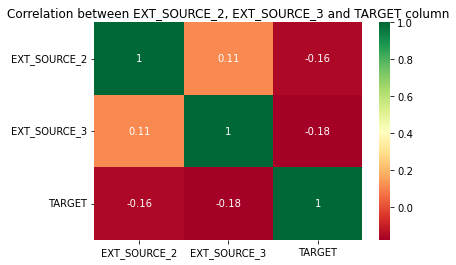

In [16]:
# Checking the relation between 'EXT_SOURCE_2' and 'EXT_SOURCE_3' columns with 'TARGET' column using heatmap as all the variale contain categorical data
sns.heatmap(appl_data[['EXT_SOURCE_2', 'EXT_SOURCE_3']+['TARGET']].corr(), annot=True,cmap='RdYlGn')
plt.title('Correlation between EXT_SOURCE_2, EXT_SOURCE_3 and TARGET column')
plt.show()

From the above plot we can see that there is no linear correlation between 'EXT_SOURCE_2' and 'TARGET' and 'EXT_SOURCE_3' and 'TARGET' columns as the respective pearson coeff. are approching to zero. Lets drop these two columns from data.

In [17]:
# Dropping the 'EXT_SOURCE_2' and 'EXT_SOURCE_3' columns from data
appl_data.drop(columns=['EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

In [18]:
# Checking the shape of the data after dropping these columns
appl_data.shape

(307511, 71)

In [19]:
# Lets view the columns having null values still present
(appl_data.isnull().sum()*100/len(appl_data)).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
                                 ...    
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
TARGET                          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
Length: 71, dtype: float64

There are still some columns having null values present. Dropping these columns is not a good idea coz these columns are important for further analysis. So, we will impute them in further part.

### 2.3) Dealing with Flag columns and checking its relation with TARGET column

In [20]:
# Creating a variable 'Flag_col' which contain all the flag columns in the data
flag_col = [i for i in appl_data.columns if 'FLAG' in i]
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

There are 28 FLAG  columns present in data

In [21]:
# Adding the 'TARGET' column in 'flag_col' and making it as a data frame for viewing the relation between them
flag_df = appl_data[flag_col+['TARGET']]
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we can see that the 'TARGET' column is a categorical type contains values 0 & 1. We have to replace 0 as a Repayer and 1 as a Defaulter. Also, for 'FLAG' columns we need to replace 0 as 'N' = False and 1 as 'Y' = True

In [22]:
# Replacing 0 as Repayer and 1 as Defaulter in 'TARGET' column
flag_df.loc[flag_df['TARGET']==0, ['TARGET']]='Repayer'
flag_df.loc[flag_df['TARGET']==1, ['TARGET']]='Defaulter'
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Defaulter
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer


The 'TARGET' column is updated. Lets replace all the FLAG columns with 0 as 'N' and 1 as 'Y'.

In [23]:
# Replacing all the FLAG columns with 0 as 'N' and 1 as 'Y'
for i in flag_df:
    if i != 'TARGET':
        flag_df[i] = flag_df[i].replace({0:'N', 1:'Y'})
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer


All the columns of flag_df are of categorical type. Hence we can plot all the graphs simultaniously to check the relation between each FLAG column and TARGET column by using subplots.

In [24]:
# Providing the numeric axes to flag_col by using function 'enumerate'
list(enumerate(flag_col))

[(0, 'FLAG_OWN_CAR'),
 (1, 'FLAG_OWN_REALTY'),
 (2, 'FLAG_MOBIL'),
 (3, 'FLAG_EMP_PHONE'),
 (4, 'FLAG_WORK_PHONE'),
 (5, 'FLAG_CONT_MOBILE'),
 (6, 'FLAG_PHONE'),
 (7, 'FLAG_EMAIL'),
 (8, 'FLAG_DOCUMENT_2'),
 (9, 'FLAG_DOCUMENT_3'),
 (10, 'FLAG_DOCUMENT_4'),
 (11, 'FLAG_DOCUMENT_5'),
 (12, 'FLAG_DOCUMENT_6'),
 (13, 'FLAG_DOCUMENT_7'),
 (14, 'FLAG_DOCUMENT_8'),
 (15, 'FLAG_DOCUMENT_9'),
 (16, 'FLAG_DOCUMENT_10'),
 (17, 'FLAG_DOCUMENT_11'),
 (18, 'FLAG_DOCUMENT_12'),
 (19, 'FLAG_DOCUMENT_13'),
 (20, 'FLAG_DOCUMENT_14'),
 (21, 'FLAG_DOCUMENT_15'),
 (22, 'FLAG_DOCUMENT_16'),
 (23, 'FLAG_DOCUMENT_17'),
 (24, 'FLAG_DOCUMENT_18'),
 (25, 'FLAG_DOCUMENT_19'),
 (26, 'FLAG_DOCUMENT_20'),
 (27, 'FLAG_DOCUMENT_21')]

The enumerate function provide the numeric axes to each of column in flag_col. The index starts from 0. We can see that there are total 28 columns in flag_col array.

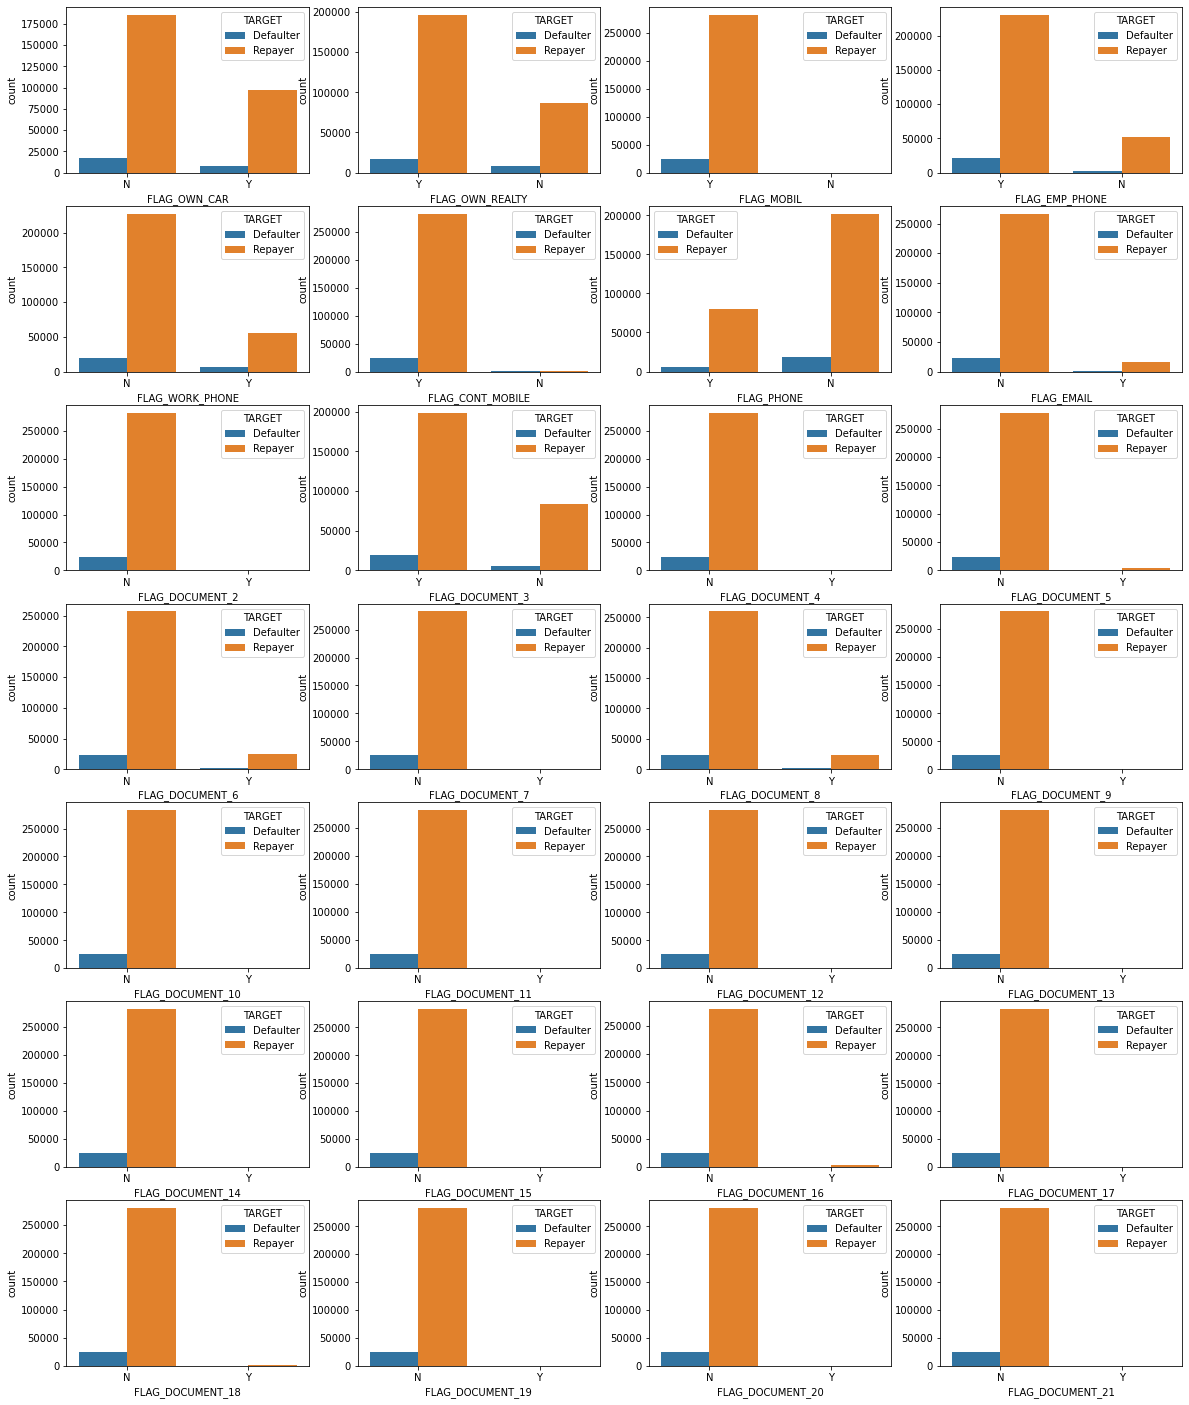

In [25]:
# lets plot the graph flag_col vs 'TARGET' column of flag_df by using subplot and countplot
plt.figure(figsize=[20,25])
for i in enumerate(flag_col):
    plt.subplot(7,4,i[0]+1)
    sns.countplot(i[1], hue='TARGET', data=flag_df)

From the above graphs we can say that 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3' have more Repayers than other columns. So we will keep these columns and drop all other columns as those columns are not important for further analysis coz there are more defaulters than Repayers. 

In [26]:
# keeping 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3' columns 
flag_df.drop(columns=['TARGET', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3'], inplace=True)

In [27]:
len(flag_df.columns)

23

So there are 23 columns left in flag_df which are not important for analysis. Lets drop it

In [28]:
# Dropping flag_df columns
appl_data.drop(flag_df.columns, axis=1, inplace=True)
appl_data.shape

(307511, 48)

After dropping all the columns of the flag_df we left with 48 columns. Which we will use for further analysis.

## 3) Imputing the values

In [29]:
# Checking the % of missing values still present in data
(appl_data.isnull().sum()*100/len(appl_data)).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REGION_POPULATION_RELATIVE      0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
FLAG_DOCUMENT_3                 0.000000
AMT_CREDIT      

We have a column 'OCCUPATION_TYPE' in our data which contains 31.34% of null values. Dropping this column does not make sense as this will directly affect the 'TARGET' variable. So, we impute another category as 'Unknown' in place of missing values in 'OCCUPATION_TYPE' column. 

In [30]:
# Imputing another category as 'Unknown' in place of missing values in 'OCCUPATION_TYPE' column
appl_data['OCCUPATION_TYPE'] = appl_data['OCCUPATION_TYPE'].fillna('Unknown')
appl_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

So, the null values are replaced by 'Unknown' category which is 31.34%.

In [31]:
# Viewing the statistical distribution of 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR' columns
appl_data[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


From the above statistical data we can see that the columns contains float64 data type. Which should be descrete and not continuous. These columns represent the number of enquiries made by the client. So, imputing the decimal values inplace of null values is incorrect approach as the number of enquiries made can not be in decimal form. Therefore, imputing mean does not make sense. So, we impute median values inplace of null. For this case study we will not impute these columns for the sake of accuracy. Hence, these columns are remain as it is.

## 4) Standerdizing the values

In [32]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,307510.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.405292,0.100049,-962.858788,0.710023,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.379803,0.362291,826.808487,0.453752,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


From above statistical data we can see that the 'AMT_INCOME_TOTAL',	'AMT_CREDIT', 'AMT_GOODS_PRICE' contain high values. Here binning is required. Also the columns regarding the days contain some -ve values. These columns need to be correct. We will convert days columns in year columns. 

In [33]:
# Standerdizing the values of  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE' columns.
appl_data['AMT_INCOME_TOTAL'] = appl_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L','7-8L', '8-9L', '9-10L', '10L Above' ]

appl_data['AMT_INCOME_RANGE'] = pd.cut(appl_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

In [34]:
appl_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

1-2L         50.735000
2-3L         21.210691
0-1L         20.729695
3-4L          4.776116
4-5L          1.744669
5-6L          0.356354
6-7L          0.282805
8-9L          0.096980
7-8L          0.052721
9-10L         0.009112
10L Above     0.005858
Name: AMT_INCOME_RANGE, dtype: float64

Here we have created buckets for different range of 'AMT_INCOME_TOTAL' by using the function cut. The lables are assigned for those buckets. A new column named 'AMT_INCOME_RANGE' is added to data frame which contain the range of total income of clients. A value_counts gives us the % of different ranges of total income of clients. So, we can see that the maximum % of clients lie in the range of 1-2L. Most of the clients are of middle class type in our data. There are very few clients whose total income range is more than 5L. Similar operation is performed for other two columns.

In [35]:
# Standerdizing the values of 'AMT_CREDIT' column
appl_data['AMT_CREDIT'] = appl_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,50]
labels = ['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L','7-8L', '8-9L', '9-10L', '10L Above' ]

appl_data['AMT_CREDIT_RANGE'] = pd.cut(appl_data['AMT_CREDIT'], bins=bins, labels=labels)

In [36]:
appl_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

2-3L         17.824728
10L Above    16.254703
5-6L         11.131960
4-5L         10.418489
1-2L          9.801275
3-4L          8.564897
6-7L          7.820533
8-9L          7.086576
7-8L          6.241403
9-10L         2.902986
0-1L          1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

Here approx 18% credited amount is in the range 2-3L.

In [37]:
# Standerdizing the values of 'AMT_GOODS_PRICE' column
appl_data['AMT_GOODS_PRICE'] = appl_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L','7-8L', '8-9L', '9-10L', '10L Above' ]

appl_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(appl_data['AMT_GOODS_PRICE'], bins=bins, labels=labels)

In [38]:
appl_data['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

2-3L         20.427819
4-5L         18.543906
6-7L         13.027246
10L Above    11.105252
1-2L         10.726712
8-9L          6.992738
3-4L          6.906485
5-6L          4.269398
0-1L          2.834656
7-8L          2.639690
9-10L         2.526096
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [39]:
# Standerdizing the days columns by taking the absolute values and converting these columns in years
appl_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = abs(appl_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']])
appl_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


All the values of days columns are taken absolute. Now lets convert days columns into years.

In [40]:
# Converting 'DAYS_BIRTH' column into years
appl_data['BIRTH_YEAR'] = appl_data['DAYS_BIRTH']/365

bins = [0,20,30,40,50,60,100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60_Above']

appl_data['AGE_GRP'] = pd.cut(appl_data['BIRTH_YEAR'], bins=bins, labels=labels)

In [41]:
appl_data['AGE_GRP'].value_counts(normalize=True)*100

30-40       26.765872
40-50       24.890492
50-60       22.133192
20-30       14.640452
60_Above    11.569993
0-20         0.000000
Name: AGE_GRP, dtype: float64

To convert 'DAYS_BIRTH' column into years we have to divide all the values of that column by 365. We add new column named 'BIRTH_YEAR' for that. Binning of the values based on 'BIRTH_YEAR' is done by using pd.cut and seperate column is assigned for those ranges named 'AGE_GRP'. Most of the clients age fall into 30-40 age group category and very few clients are above 60 age. Similar method is used to convert 'DAYS_EMPLOYED' column into years.

In [42]:
# Converting 'DAYS_EMPLOYED' column into years
appl_data['YEARS_EMPLOYED'] = appl_data['DAYS_EMPLOYED']/365

bins = [0,5,10,15,20,25,30,50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', 'Above_30']

appl_data['YEARS_EMPLOYED_GRP'] = pd.cut(appl_data['YEARS_EMPLOYED'], bins=bins, labels=labels)

In [43]:
appl_data['YEARS_EMPLOYED_GRP'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
Above_30     1.191822
Name: YEARS_EMPLOYED_GRP, dtype: float64

'YEARS_EMPLOYED_GRP' column contains year wise buckets for employment of the clients. The employment years of most of the clients lie in the range of 0-5 years i.e most of the clients are employed from last 5 years and very few clients have employed from last 15-30 years.

## 5) Identifying Outliers

In [44]:
# Checking the outliers from statistical distribution
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BIRTH_YEAR,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307510.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,...,962.858788,0.710023,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,...,826.808487,0.453752,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,...,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,...,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,...,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,...,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


We will check the difference between max and 75% for each of the columns to identify the outliers. For the columns 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED' the difference is high. We will plot a boxplot to visualize the outliers in those columns. 

In [45]:
# Making an array of outlier columns
outlier_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
outlier_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

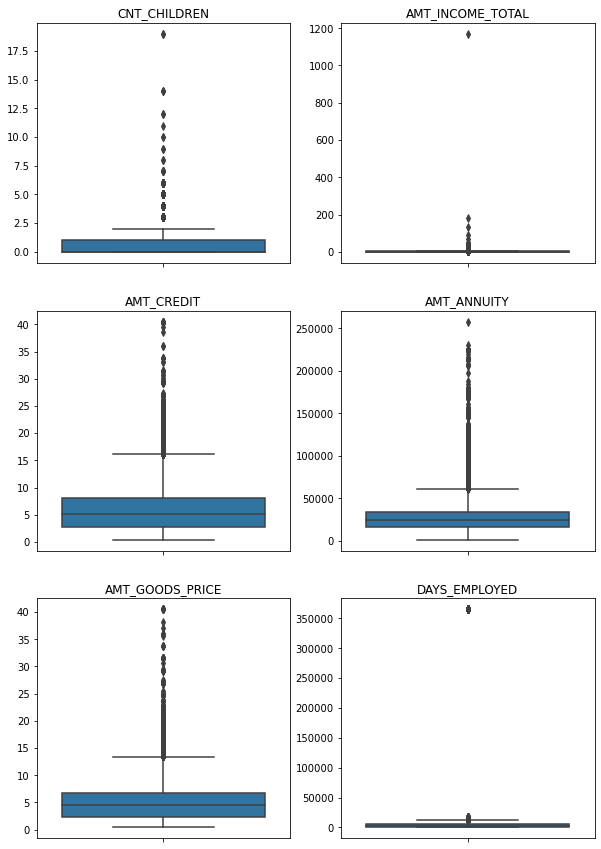

In [46]:
# Plotting boxplot to visualize the outliers
plt.figure(figsize=[10,15])
for i,j in zip(outlier_cols, range(len(outlier_cols))):
    plt.subplot(3,2,j+1)
    sns.boxplot(y=appl_data[i])
    plt.ylabel('')
    plt.title(i)

We can see from above plots that the columns 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' have some outlier values. The column 'AMT_INCOME_TOTAL' has extreme high value means that some of the clients have high income than others. The column 'DAYS_EMPLOYED' also have extreme high value of approx 350000 days i.e 959 years which is impossible. This is an incorrect entry.

In [47]:
# Converting some object type columns into categorical and making an array of those columns named 'categorical_col'
categorical_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_REALTY', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'AGE_GRP', 'YEARS_EMPLOYED_GRP']
for i in categorical_col:
    appl_data[i] = pd.Categorical(appl_data[i])
appl_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

We can see the data types of columns 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_REALTY', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'AGE_GRP', 'YEARS_EMPLOYED_GRP' are categorical type for further univariate and bivariate analysis.

In [48]:
# Checking the shape of data set
appl_data.shape

(307511, 55)

At the end we left with 3,07,511 rows and 55 columns for univariate and bivariate analysis.

## 6) Final Data Analysis

### i) Imbalance in the data

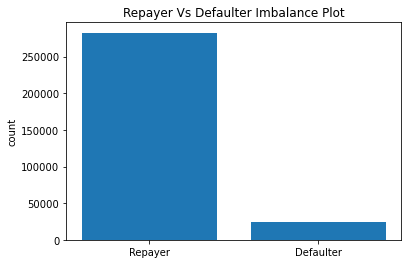

In [49]:
# Checking the imbalance in the data 
plt.bar(x=['Repayer', 'Defaulter'], height=appl_data['TARGET'].value_counts())
plt.ylabel('count')
plt.title('Repayer Vs Defaulter Imbalance Plot')
plt.show()

From the above plot we can see, there are more number of repayers than defaulters in our data set.

In [50]:
# Creating lists of numerical and categorical columns from data set
num_col = list(appl_data.select_dtypes(['int64', 'float64']).columns)
cat_col = list(appl_data.select_dtypes(['category']).columns)

### ii) Univariate Analysis of Categorical Variables

In [51]:
# Lets create a function 'data_type' which returns the data type of each column
def data_type(dataset, col):
    if dataset[col].dtype=='int64' or dataset[col].dtype=='float64':
        return 'numerical'
    if dataset[col].dtype=='category':
        return 'categorical'

The dataset and col are the attributes paased through the function 'data_type'. dataset is our appl_data and col is each variable need to be analysed. If the data type of col of the dataset is int64/float64 then the function returns the col as 'numerical' and if the data type of col of the dataset is category then the function returns the col as categorical. 

In [52]:
# Now lets create another function 'univariate' which plots the distribution plot similar to histogram if the data_type of col of the dataset is numerical 
# and plots the count plot if the col is categotical. 
def univariate(dataset, col, target_col, y_log=True, x_set_size=False, h_layout=True):
    if data_type(dataset, col)== 'numerical':
        sns.distplot(dataset[col])
    elif data_type(dataset, col)== 'categorical':
        df=pd.DataFrame({col:dataset[col].value_counts().index, 'count': dataset[col].value_counts().values})  
        
# Here the column to be analysed is grouped and the mean value of the target_col is taken without default index in percentage.
# Then the values are sorted based on target_col.
        percent=appl_data[[col, target_col]].groupby(col, as_index=False).mean()
        percent[target_col] = percent[target_col]*100
        percent.sort_values(by=target_col, inplace=True)
        
# Here for horizontal layout two axes are created to plot the subplots having ncols=2 and nrows=1
        if h_layout:
            fig, (ax1, ax2)=plt.subplots(ncols=2)
        else:
            fig, (ax1, ax2)=plt.subplots(nrows=1)
            
# For the axis ax1 the count plot is created when the data_type of col is categorical. X axis contain the col to be analysed
# and Y axis contain count of the target_col.  
        s = sns.countplot(ax=ax1, x=col, hue=target_col, data=dataset)
        ax1.set_xticklabels(s.get_xticklabels(), rotation=90)
        ax1.set_title(col)
        ax1.set_xlabel('')
        ax1.legend(['Repayer', 'Defaulter'])
        
# If x axis of the plot is not readable change the size of the plot by using following command
        if x_set_size:
            fig.set_size_inches(30,5)
        else:
            fig.set_size_inches(15,5)
        
        
# For the axis ax2 a bar plot is created for the % data of target_col. X axis contain the col to be analysed 
# and Y axis contain the % data of target_col
        s1 = sns.barplot(ax=ax2, x=col, y=target_col, data=percent, color='orange')
        ax2.set_xticklabels(s1.get_xticklabels(), rotation=90)
        ax2.set_title('% Defaulters in ' +  col)
        ax2.set_xlabel('')
        
# For the readability of plots lets set the yscale to log 
        if y_log:
            ax1.set_yscale('log')
            ax1.set_ylabel('count(log)')
        
        
        plt.show()

The above function plot two plots 1) count plot of column to be analysed with respect to TARGET column. 2) % of defaulters present in that column.

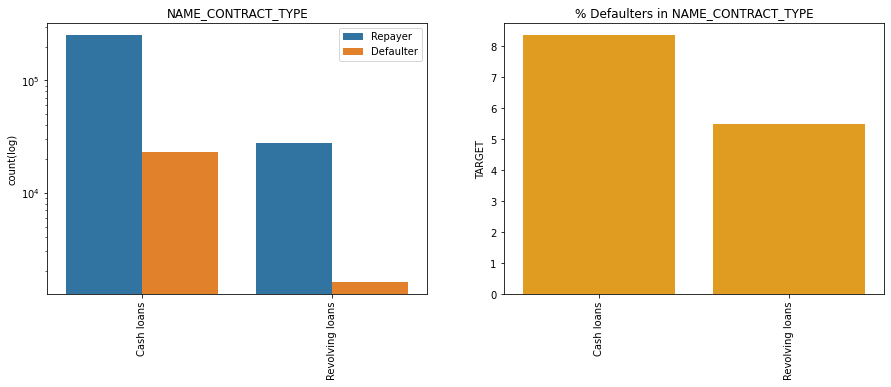

In [53]:
# Checking the count of Repayers and Defaulters in 'NAME_CONTRACT_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'NAME_CONTRACT_TYPE', 'TARGET', True)

There are two loan contract types 'Cash loans' & 'Revolving loans' present in our data. The applications for Cash loans are more than the Revolving loans. 8-9% defaulters (Clients with payment difficulty) are present in Cash loan sections and 5-6% defaulters are present in Revolving loan section. The clients with payment difficulty are more in Cash loan section than Revolving because of more number of applications.

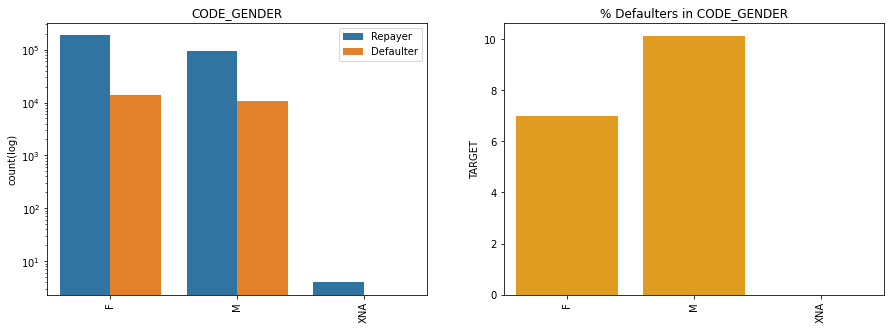

In [54]:
# Checking the count of Repayers and Defaulters in 'CODE_GENDER' col based on the 'TARGET' col
univariate(appl_data, 'CODE_GENDER', 'TARGET', True)

From the above plots we can see that the male applicants have more probable chances of having payment difficulty than female applicants. The number of female applicants are also more than male.

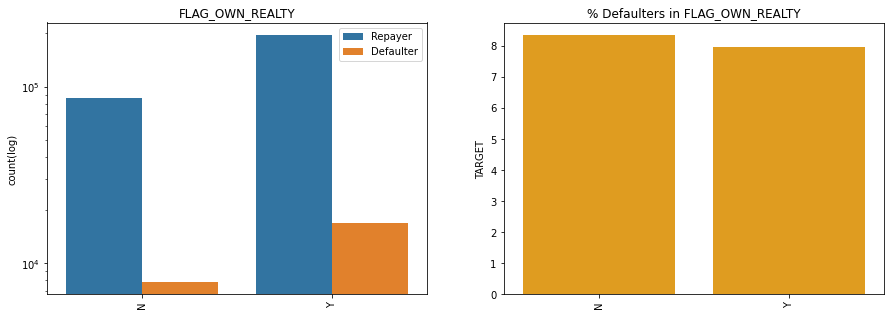

In [55]:
# Checking the count of Repayers and Defaulters in 'FLAG_OWN_REALTY' col based on the 'TARGET' col
univariate(appl_data, 'FLAG_OWN_REALTY', 'TARGET', True)

The clients who purchased real estate property also have the payment difficulty almost equal to the clients who dont purchased the real estate property. From that we can say that there is non corelation between owning the real estate property and defaulting the loan.

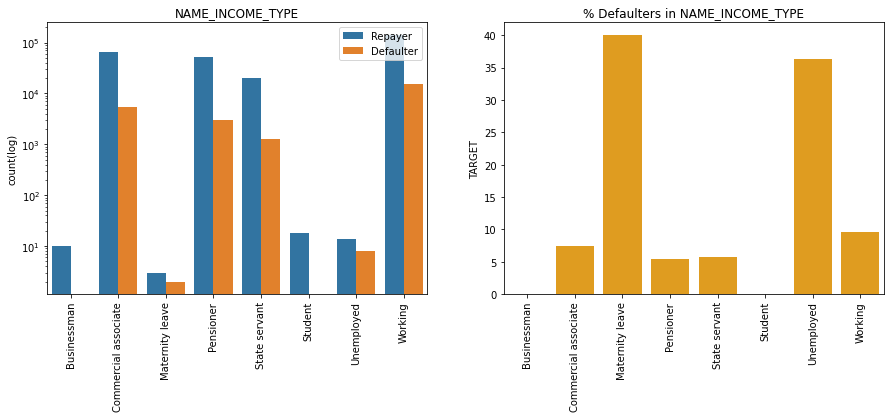

In [56]:
# Checking the count of Repayers and Defaulters in 'NAME_INCOME_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'NAME_INCOME_TYPE', 'TARGET', True)

Most of the clients applied for loans are from working category followed by commercial associate, pensioner and state servant. The clients from maternity leave have 40% of chances of payment difficulty followed by unemployed category. Buisnessman and students are safest categories to provide loan. 

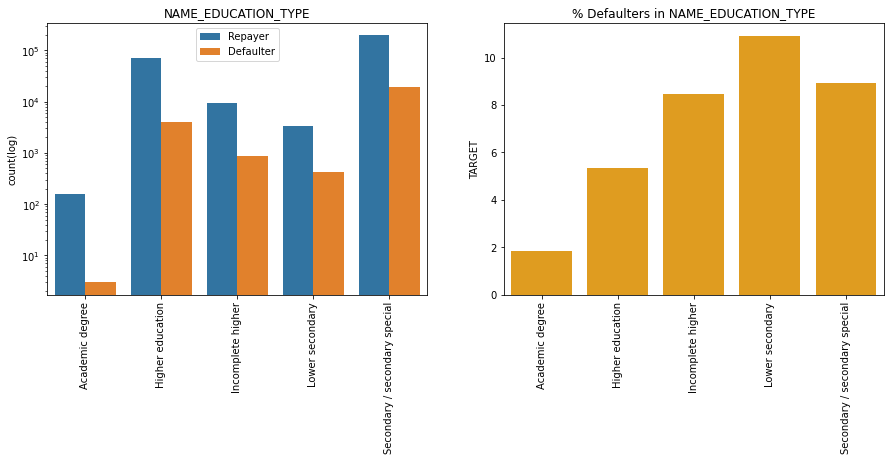

In [57]:
# Checking the count of Repayers and Defaulters in 'NAME_EDUCATION_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'NAME_EDUCATION_TYPE', 'TARGET', True)

Most of the loan applicants have completed their secondary education and higher education. The clients who completed their lower secondary education have highest rate of payment difficulty. There are less applicant who have academic degree and also have less chances of defaulting the loan.

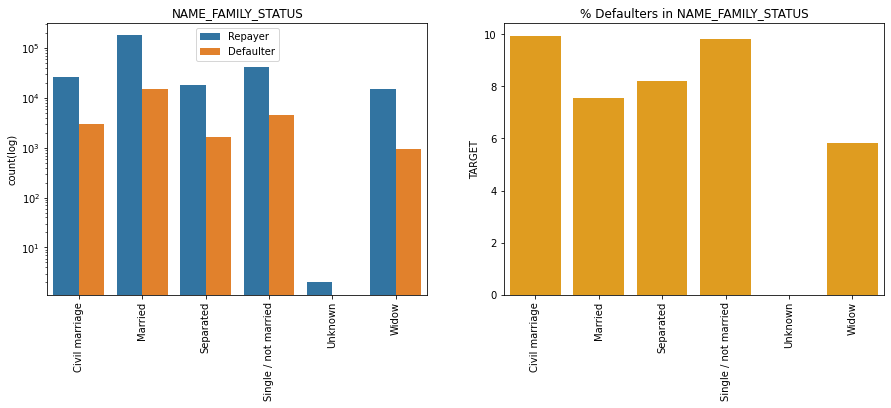

In [58]:
# Checking the count of Repayers and Defaulters in 'NAME_FAMILY_STATUS' col based on the 'TARGET' col
univariate(appl_data, 'NAME_FAMILY_STATUS', 'TARGET', True)

There are more number of applicants from married category followed by single. The applicants from civil marriage category and single (not married) category have high chances of defaulting the loan. 

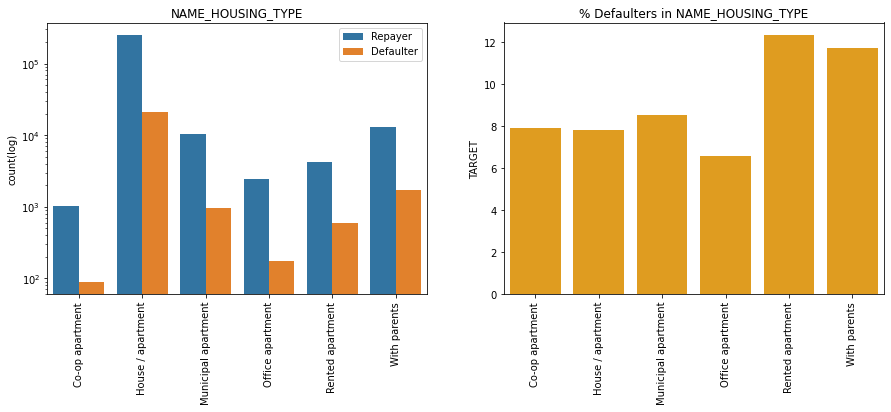

In [59]:
# Checking the count of Repayers and Defaulters in 'NAME_HOUSING_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'NAME_HOUSING_TYPE', 'TARGET', True)

Most of the clients applied for loan live in house/apartment. The people who rented apartment or live with parents have high chances of having payment difficulty. The people who live in office apartment is the best option to provide the loan as they contain less defaulters.

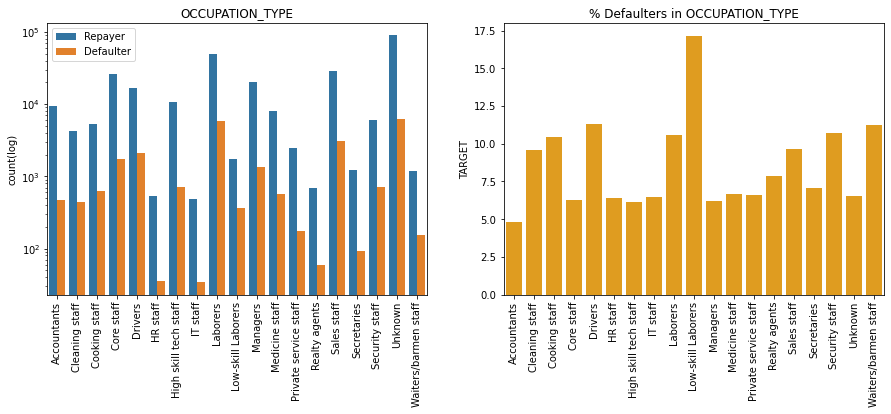

In [60]:
# Checking the count of Repayers and Defaulters in 'OCCUPATION_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'OCCUPATION_TYPE', 'TARGET', True)

The occupation type of most of the clients is unknown. Low skill laborers and drivers have more chances of defaulting the loan. The people who work as a accountant are likely to pay the loan.

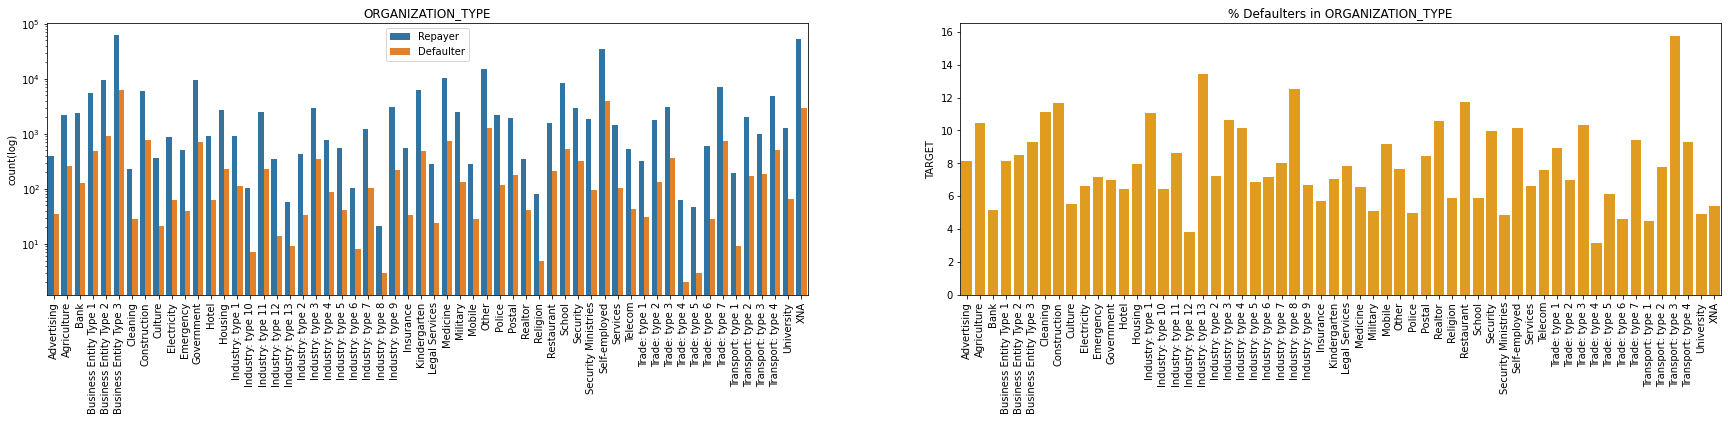

In [61]:
# Checking the count of Repayers and Defaulters in 'ORGANIZATION_TYPE' col based on the 'TARGET' col
univariate(appl_data, 'ORGANIZATION_TYPE', 'TARGET', True, True)

The Organisation type of most of the applicants is of buisness entity type 3. Followed by that most of the applicant are self employed. The applicants whose organisation type is transport type 3 have more chances of having payment difficulties followed by that the applicants from industry type 13. The applicants working in industry type 12, trade type 4 and transport type 1 have less % of defaulting rate. For very high number of applications the information of organisation type is not provided.

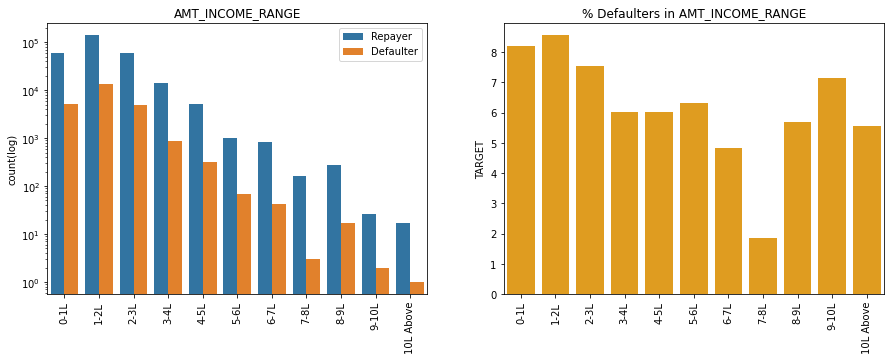

In [62]:
# Checking the count of Repayers and Defaulters in 'AMT_INCOME_RANGE' col based on the 'TARGET' col
univariate(appl_data, 'AMT_INCOME_RANGE', 'TARGET', True)

The income range of most of the applicants is in 1-2L also the rate of having payment difficulty is more than 8% which is max. The people whose income range is 7-8L are more likely to pay the loan. 

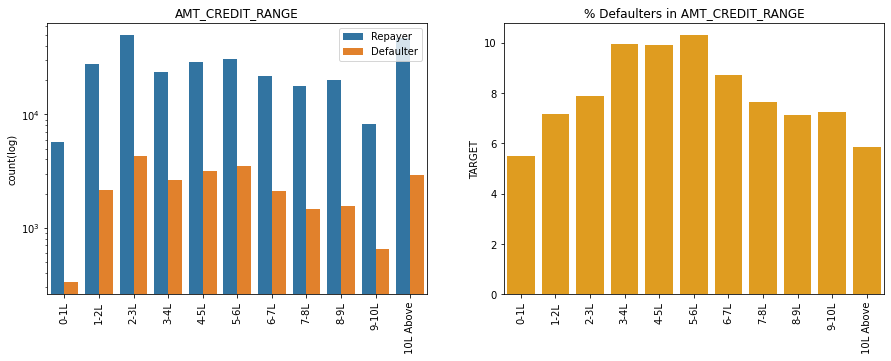

In [63]:
# Checking the count of Repayers and Defaulters in 'AMT_CREDIT_RANGE' col based on the 'TARGET' col
univariate(appl_data, 'AMT_CREDIT_RANGE', 'TARGET', True)

Most of the applicants have loan in range of 2-3L and above 10L. The applicants having loan ranges from 3-6L have more defaulters.

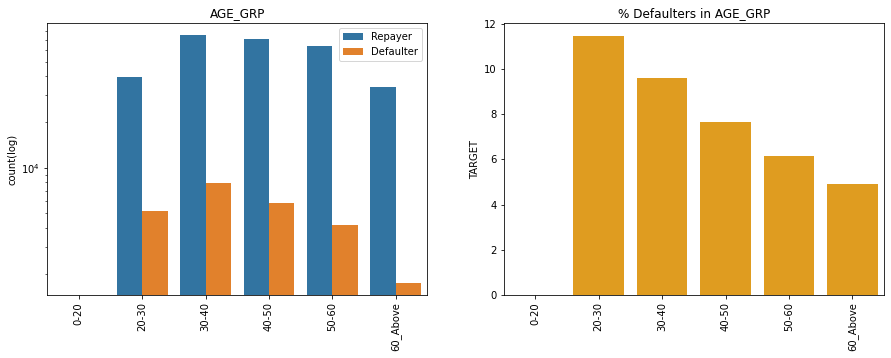

In [64]:
# Checking the count of Repayers and Defaulters in 'AGE_GRP' col based on the 'TARGET' col
univariate(appl_data, 'AGE_GRP', 'TARGET', True)

We can see here, most of the loan applicants are from 30-60 years old. The applicants whose age is 20-30 years have defaulters more than 11%. The applicants above 60 years old are more likely to pay the loan.

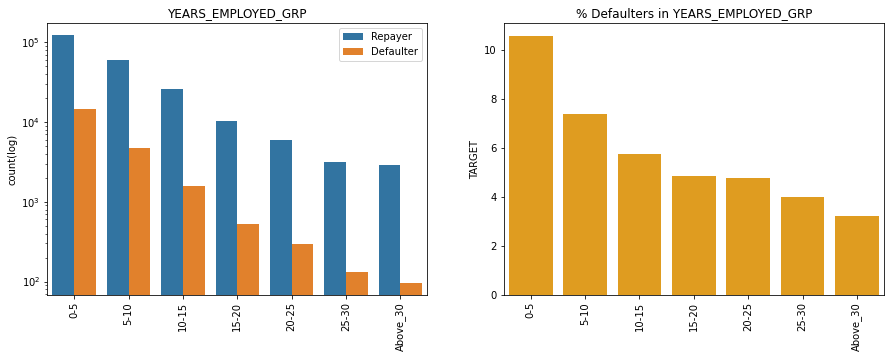

In [65]:
# Checking the count of Repayers and Defaulters in 'YEARS_EMPLOYED_GRP' col based on the 'TARGET' col
univariate(appl_data, 'YEARS_EMPLOYED_GRP', 'TARGET', True)

The applicants having more than 30 years of expirience or employed more than 30 years have less than 4% defaulters and the applicants having 5-10 years of expirience have more number of defaulters. With the increase in number of years of expirience the defaulting rate decreases.

### iii) Univariate Analysis of Numerical Variables

In [66]:
# Based on the TARGET variable 0 and 1, devide the appl_data into 'Defaulter_df' and 'Repayer_df' to check the distribution of Defaulters and Repayers in each of numerical col
Repayer_df = appl_data[appl_data['TARGET']==0]
Defaulter_df = appl_data[appl_data['TARGET']==1]

In [67]:
# Lets make a list of AMT columns
amount = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
amount

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

These are the numerical variables we are interested in. Lets plot a distriution of each of these variables with respect to TARGET variable.

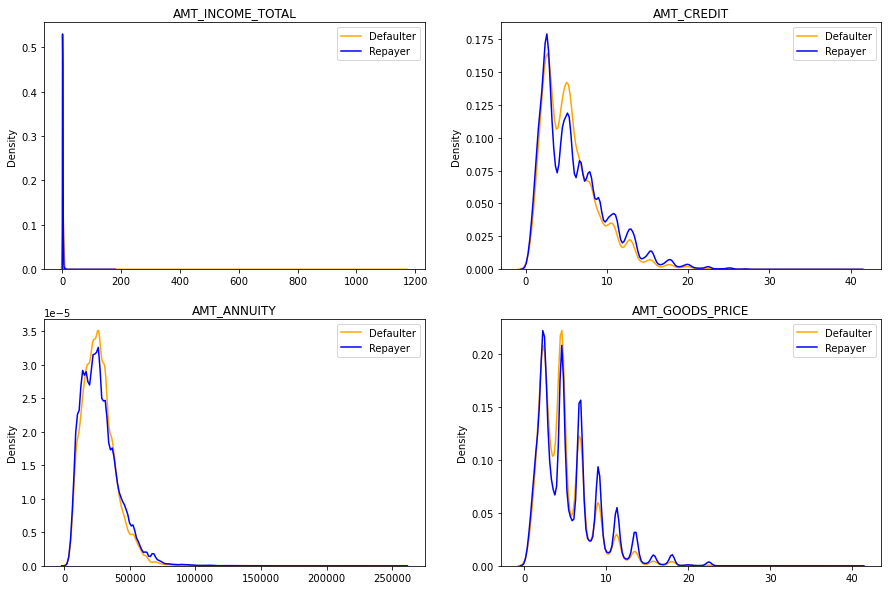

In [68]:
# Plotting subplot of distributions of each of above columns w.r.t TARGET column
plt.figure(figsize=[15,10])

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], label='Defaulter', hist=False, color='orange')
    sns.distplot(Repayer_df[i[1]], label='Repayer', hist=False, color='b')
    plt.title(i[1])
    plt.legend()
    plt.xlabel('')

As we can see, the graphs for Defaulter, and for Repayer are overlapping means that we cannot use either of these variables to make a decision. The loan amount credited mostly is below 10L. For the loan credited the annuity paid by most of the people is below 50K. The maximum number of loans given to Goods_price are below 10L.

### iv) Bivariate Analysis of Categorical Variables

In [69]:
# Groupby the data by 'NAME_INCOME_TYPE' column and taking the mean of 'AMT_INCOME_TOTAL' column to check the relation between these columns.
appl_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean()

NAME_INCOME_TYPE
Businessman             6.525000
Commercial associate    2.029553
Maternity leave         1.404000
Pensioner               1.364013
State servant           1.797380
Student                 1.705000
Unemployed              1.105364
Working                 1.631699
Name: AMT_INCOME_TOTAL, dtype: float64

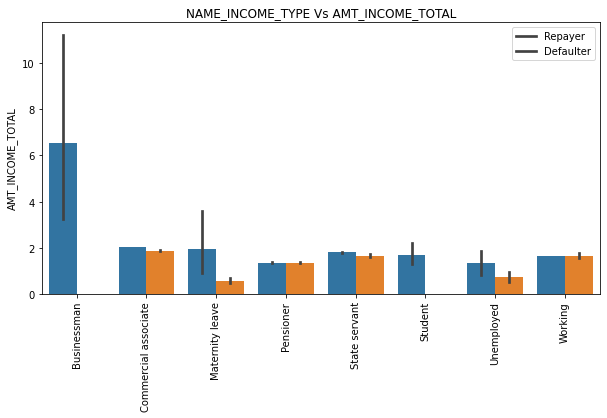

In [70]:
# Lets plot the barplot for above columns
plt.figure(figsize=[10,5])

sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=appl_data, hue='TARGET')
plt.xlabel('')
plt.title('NAME_INCOME_TYPE Vs AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.legend(['Repayer', 'Defaulter'])
plt.show()

From above statistical data and graph we can see that, the average total income of buisnessman income type category is 6.5L which is maximum. There are no defaulters in buisnessman and student income type category. These categories are the safest to provide the loan. The average income of student type category is 1.7L.

In [71]:
# Groupby the Age column and taking the mean of 'AMT_INCOME_TOTAL' column
appl_data.groupby('AGE_GRP')['AMT_INCOME_TOTAL'].mean()

AGE_GRP
0-20             NaN
20-30       1.595206
30-40       1.788888
40-50       1.805655
50-60       1.651283
60_Above    1.388975
Name: AMT_INCOME_TOTAL, dtype: float64

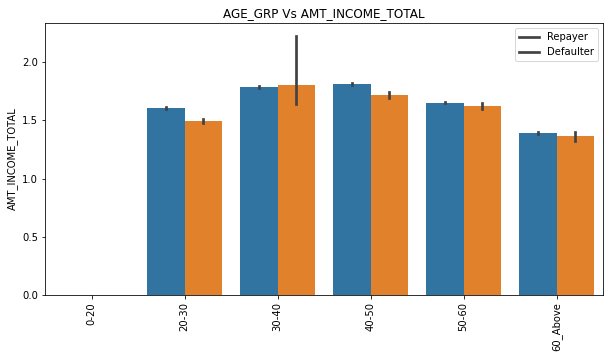

In [72]:
# Lets plot the barplot for above columns
plt.figure(figsize=[10,5])

sns.barplot(x='AGE_GRP', y='AMT_INCOME_TOTAL', data=appl_data, hue='TARGET')
plt.xlabel('')
plt.title('AGE_GRP Vs AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.legend(['Repayer', 'Defaulter'])
plt.show()

The average total income of people having age group between 30-50 is approx 1.8L. 

In [73]:
# Groupby the 'NAME_INCOME_TYPE' column and taking the mean of 'AMT_ANNUITY' column
appl_data.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].mean()

NAME_INCOME_TYPE
Businessman             72675.000000
Commercial associate    30415.221067
Maternity leave         36986.400000
Pensioner               23900.400293
State servant           28864.490392
Student                 25188.000000
Unemployed              28178.386364
Working                 26492.651756
Name: AMT_ANNUITY, dtype: float64

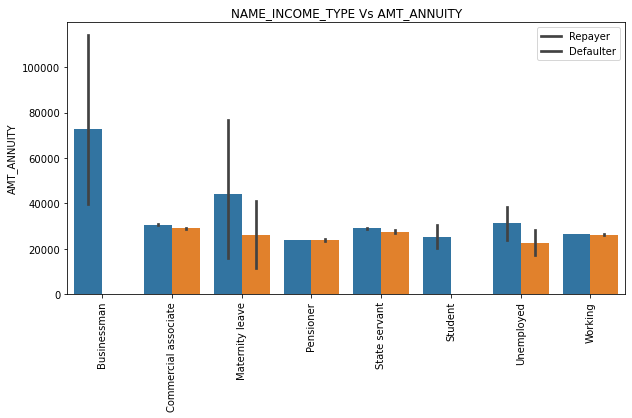

In [74]:
plt.figure(figsize=[10,5])

sns.barplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=appl_data, hue='TARGET')
plt.xlabel('')
plt.title('NAME_INCOME_TYPE Vs AMT_ANNUITY')
plt.xticks(rotation=90)
plt.legend(['Repayer', 'Defaulter'])
plt.show()

As we have seen the average total income of buisnessman category is maximum. Therefore the annuity paid by the buisnessman category is also maximum ranges from 40K to more than 1L. The average annuity paid by the buisnessman is approx 72K. The annuity paid by the maternity leave category is second maxiumum ranges from 20K to 80K.

### v) Bivariate Analysis of Numerical Variables

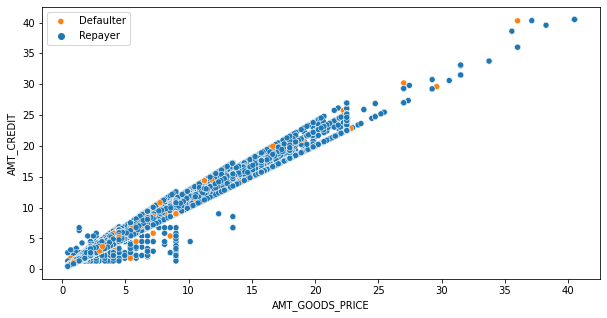

In [75]:
# Lets check the relation between two numeric columns 'AMT_GOODS_PRICE' and 'AMT_CREDIT'.
plt.figure(figsize=[10,5])

sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=appl_data, hue='TARGET')
plt.legend(['Defaulter', 'Repayer'])
plt.show()

We can see here, as the credit amount increases above 25-30L the number of defaulters decreases.

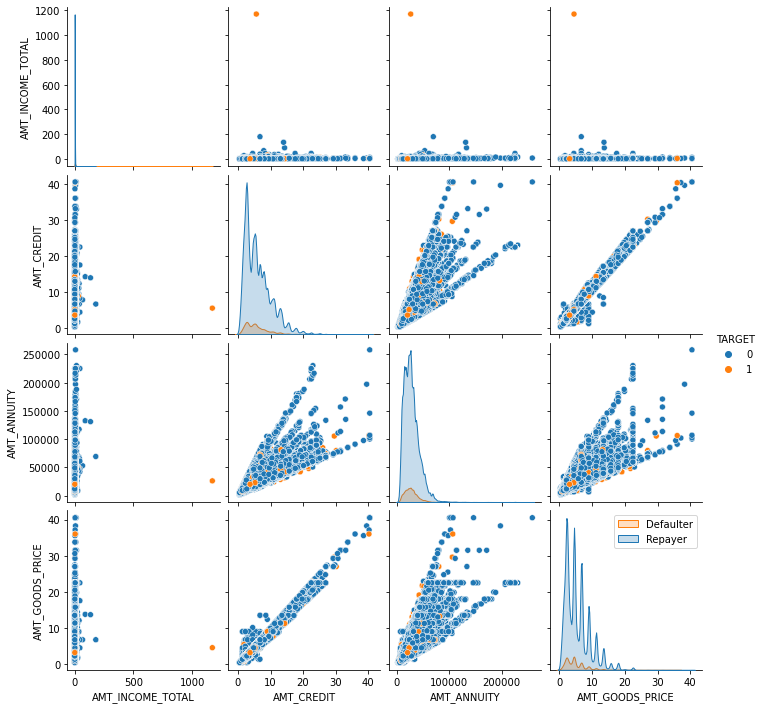

In [76]:
# Ploting the pairplot for AMT variables to check the relation between each AMT column with respect to TARGET column.
sns.pairplot(appl_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']], hue='TARGET')
plt.legend(['Defaulter', 'Repayer'])
plt.show()

There is a high correlation between 'AMT_CREDIT' and 'AMT_GOODS_PRICE'. 'AMT_CREDIT' linearly increases with 'AMT_GOODS_PRICE'. As the credit amount increases above 20L the number of defaulters decreases. When the credited amount is above 20-25L the annuity paid is above 1.5L, there are less defaluters.

### vi) Correlation of Repayer and Defaulter_df

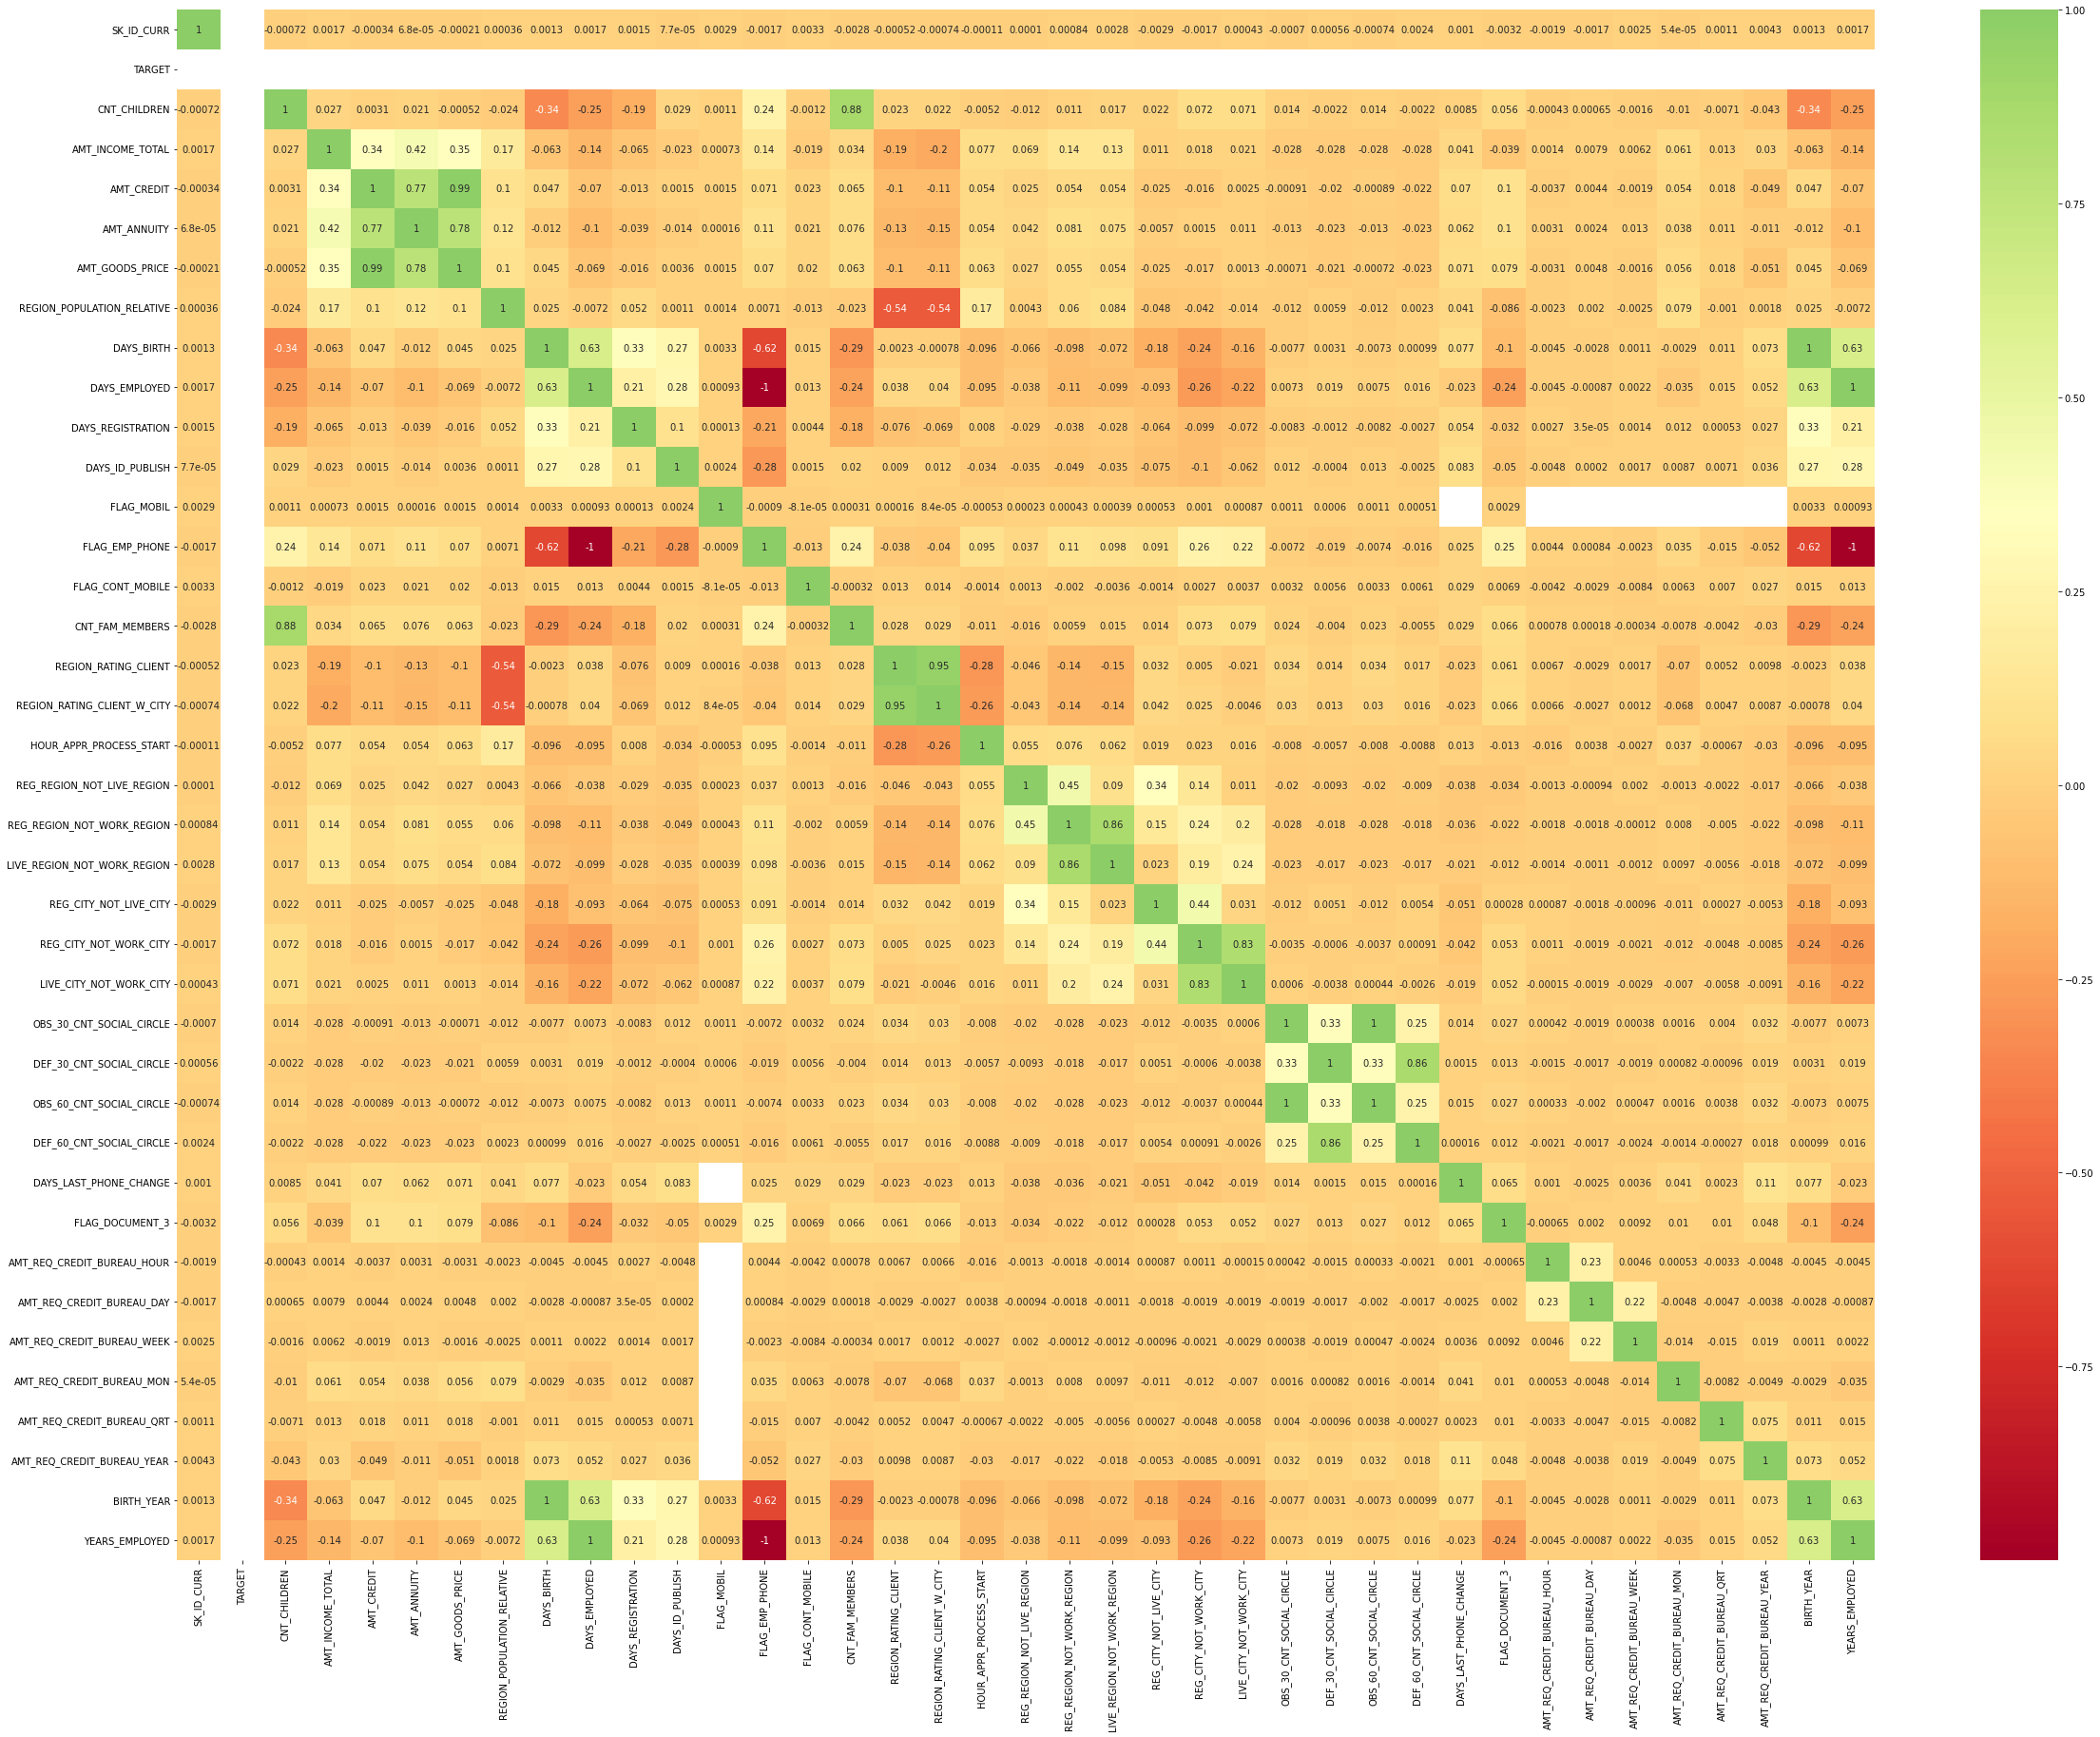

In [77]:
# Checking the correlation between Repayer_df
plt.figure(figsize=[40,30])
sns.heatmap(Repayer_df.corr(), annot=True, cmap='RdYlGn', center=0.35)
plt.show()

There is high +ve linear correlation between 'AMT_CREDIT' 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'. 'AMT_INCOME _TOTAL' also have +ve correlation with 'AMT_CREDIT' 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'.

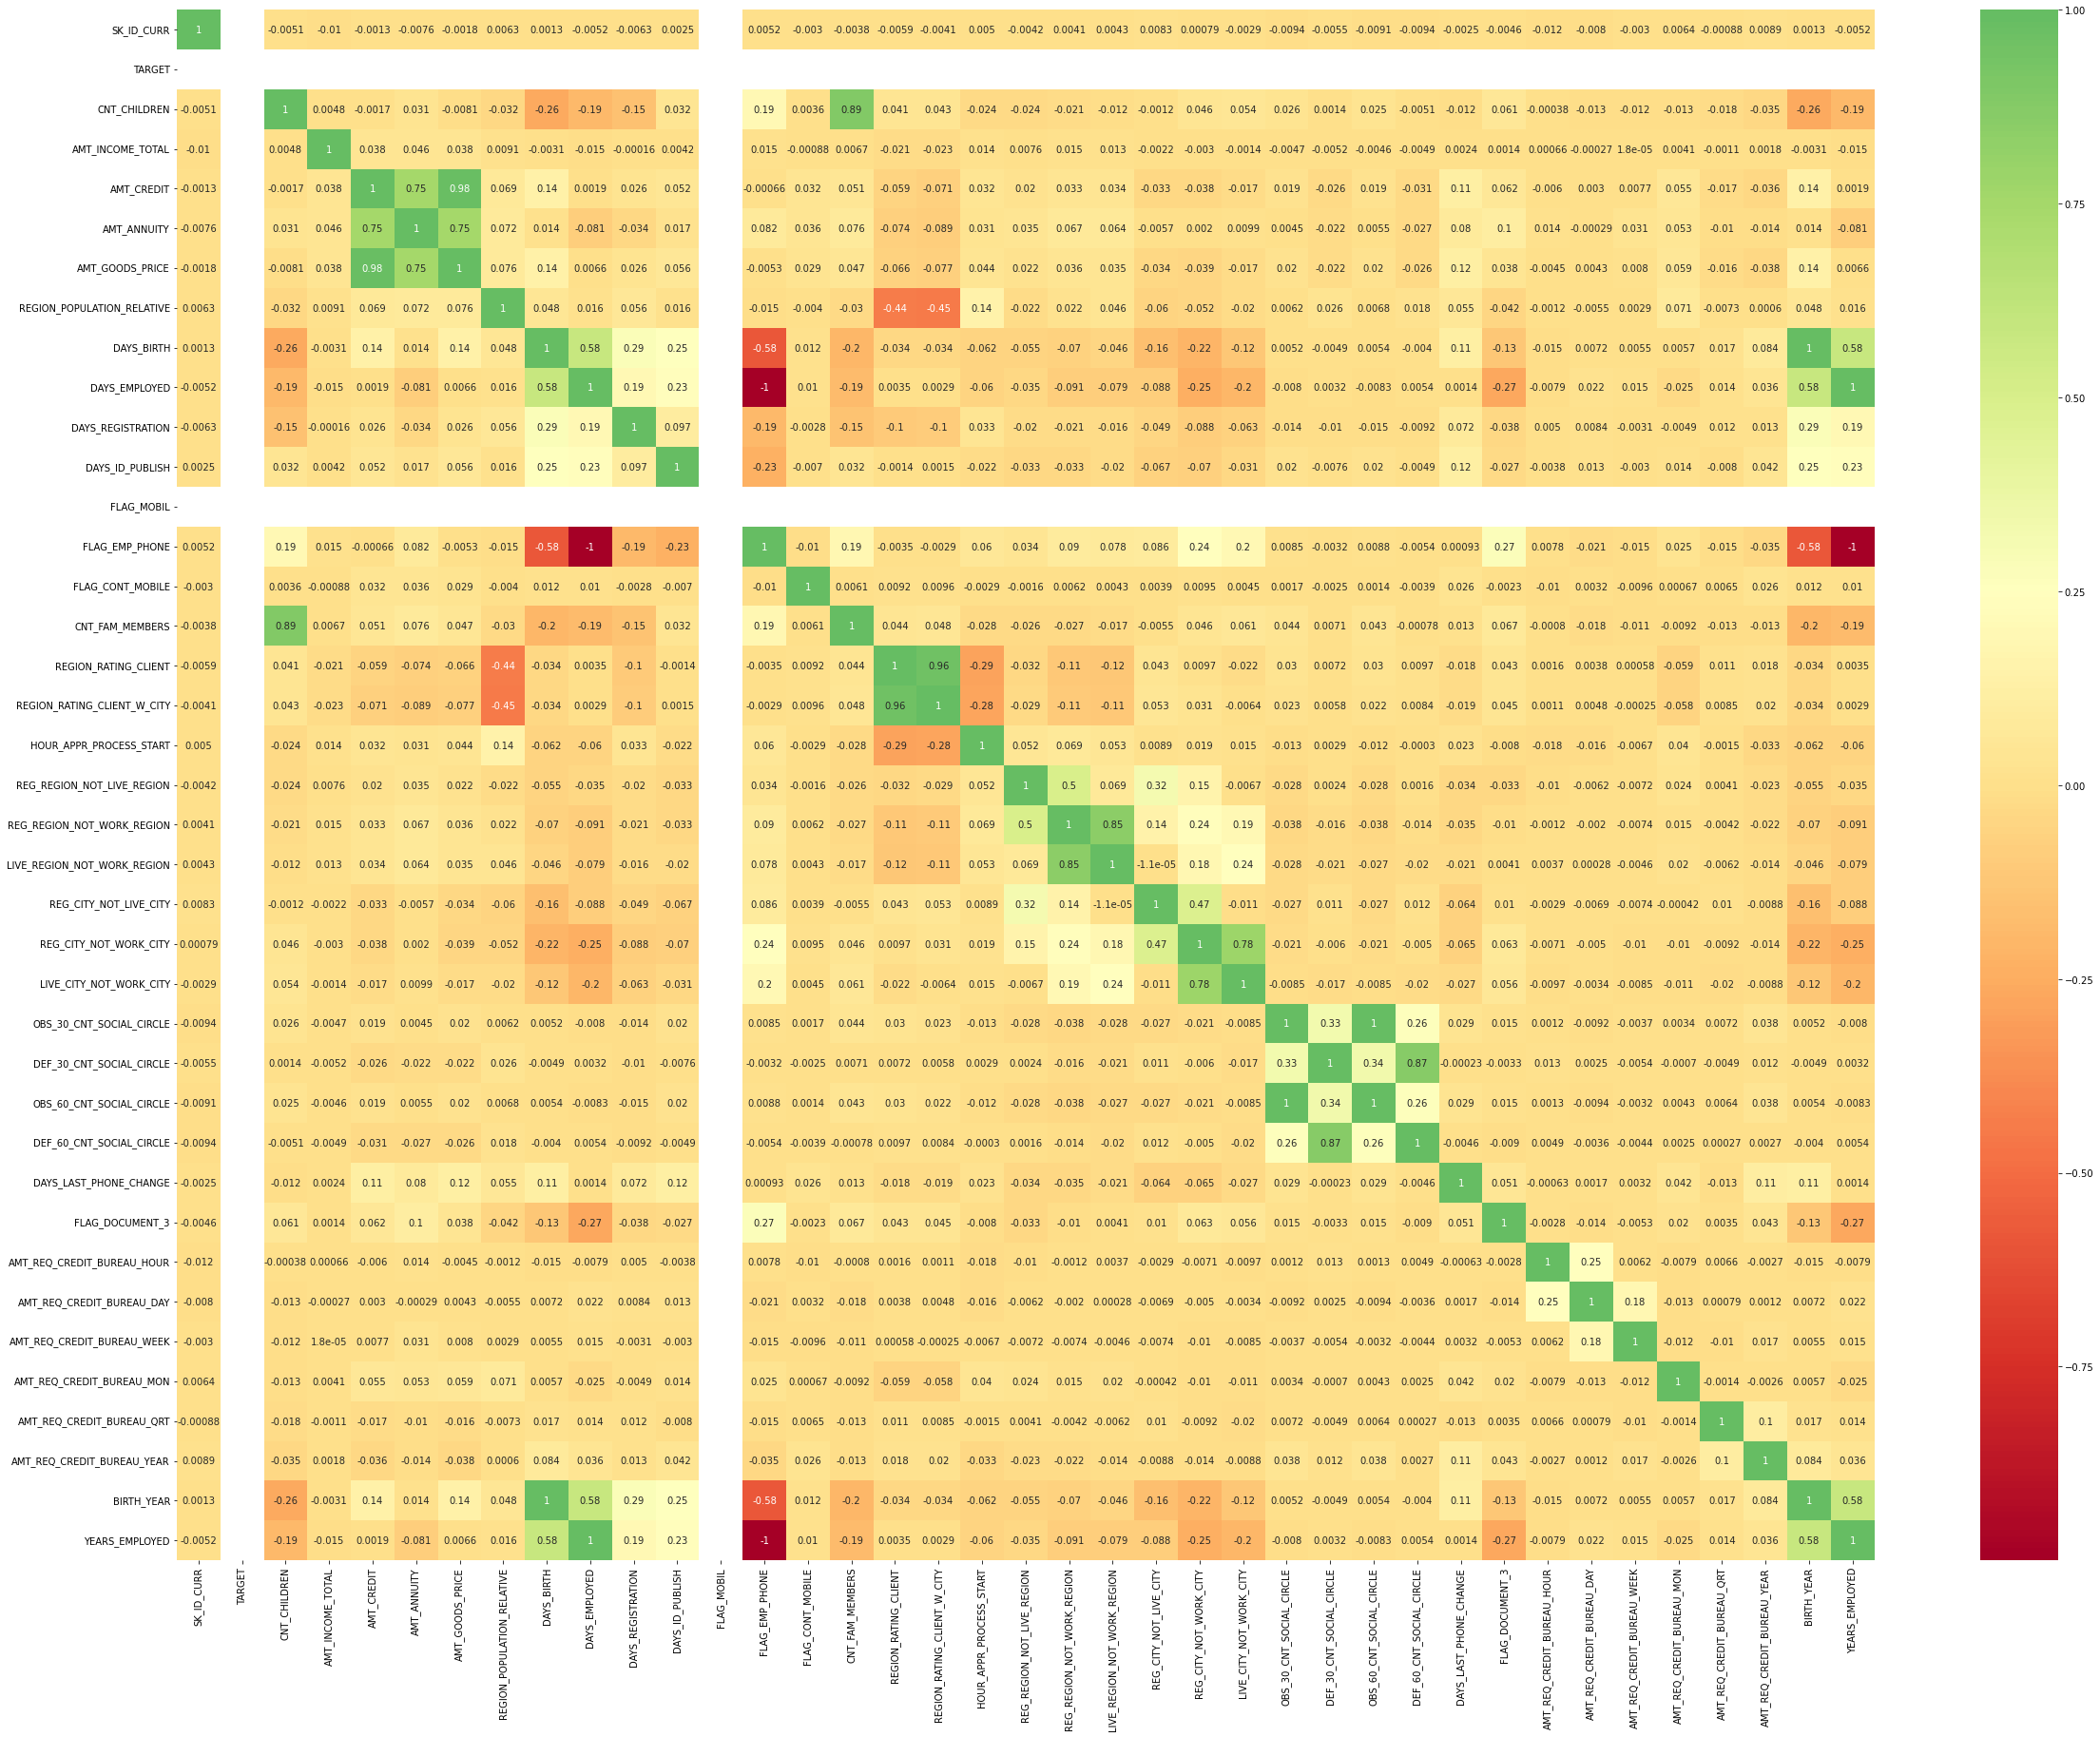

In [78]:
# Checking the correlation between Defaulter_df
plt.figure(figsize=[40,30])
sns.heatmap(Defaulter_df.corr(), annot=True, cmap='RdYlGn', center=0.25)
plt.show()

As in the Repayer_df 'AMT_CREDIT' have strong +ve correlation with 'AMT_GOODS_PRICE' and 'AMT_ANNUITY' with slightly less pearson coefficient. There is a sevier drop in correlation between 'AMT_INCOME _TOTAL' and 'AMT_CREDIT'. As compared to Repayer_df the Defaulter_df has lowered correlation between 'DAYS_EMPLOYED'.

## 7) Loading Dataset 2 'previous_application.csv' 

## 7.1) Understanding the data

In [79]:
# Loading the 'previous_application.csv file'
prev_data = pd.read_csv('F:\\UpGrad\\Credit EDA Assignment\\Credit EDA Case Study\\previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
prev_data.shape

(1670214, 37)

There are 1670214 number of rows and 37 number of columns in the data. Now lets check the data types of each column.

In [81]:
# Checking tha data type of columns
prev_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

There are 15 columns with float64 data type, 6 columns with int64 data type and 16 columns with object data type. Now check the statistical information available in the data.

In [82]:
# Checking the statistical information of numerical columns
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


The columns 'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION' have some -ve values which is not possible. We have to take the absolute values of those. The columns 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'DAYS_DECISION', 'CNT_PAYMENT'  contain some outlier values as the difference between their 75% and max value is high. 

## 7.2) Data Cleaning

In [83]:
# Checking the % null values present in prev_data dataset columnwise
null_values_prev_data = (prev_data.isnull().sum()*100/len(prev_data)).sort_values(ascending=False)
null_values_prev_data

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

The columns 'RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT' contain null values greater than 50%. Lets drop it due to higher null%.

In [84]:
# Drop the columns containing null values greater than 50%
prev_data_null50 = null_values_prev_data[null_values_prev_data>50]
prev_data.drop(columns=prev_data_null50.index, inplace=True)

In [85]:
prev_data.shape

(1670214, 33)

In [86]:
# Now listing the columns which are not important and drop it
non_imp_cols = ['NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START']
prev_data.drop(columns=non_imp_cols, inplace=True)

In [87]:
prev_data.shape

(1670214, 29)

After dropping the null value>50 columns and non_imp columns we left with 29 columns in our data for further analysis.

## 7.3) Imputing the values

In [88]:
# Changing the sign of the values in DAYS columns from -ve to +ve
days_col_prev_data = ['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'DAYS_DECISION']
prev_data[days_col_prev_data] = abs(prev_data[days_col_prev_data])
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,8.806797e+02,3.139511e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,2.800000e+02,-1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [89]:
# Now lets impute the value 'Unknown' for null values in 'NAME_TYPE_SUITE' column.
prev_data['NAME_TYPE_SUITE'] = prev_data['NAME_TYPE_SUITE'].fillna('Unknown')
(prev_data.isnull().sum()*100/len(prev_data)).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
SK_ID_PREV                    0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
NAME_TYPE_SUITE               0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE   

Still there are columns with null values greater than 15%. We will impute the columns 'AMT_GOODS_PRICE', 'AMT_ANNUITY' and keep other columns as it is.

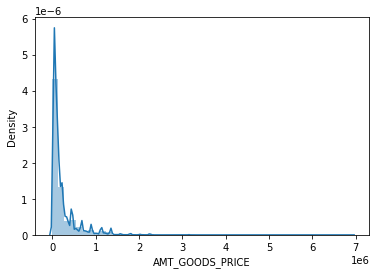

In [90]:
# For the column 'AMT_GOODS_PRICE' lets check the distribution of values
sns.distplot(prev_data['AMT_GOODS_PRICE'])
plt.show()

We can see several peaks in the graph which makes a pattern. Also there is one high peak which represents the presence of outliers in the data. So, imputing mean value hear is not a good option. Hence, we will impute mode of the data.

In [91]:
# Imputing mode of the data in the 'AMT_GOODS_PRICE' col
prev_data['AMT_GOODS_PRICE'].fillna(prev_data['AMT_GOODS_PRICE'].mode()[0], inplace=True)

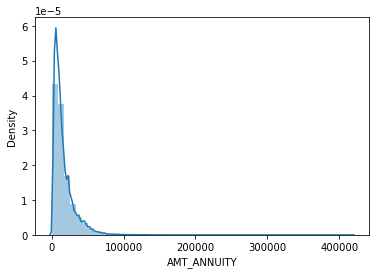

In [92]:
# For the column 'AMT_ANNUITY' lets check the distribution of values
sns.distplot(prev_data['AMT_ANNUITY'])
plt.show()

The graph of distribution of values represents the presence of outliers. There is no pattern observed in the data. Hence, imputing median value is a safe option.

In [93]:
# Imputing median of the data in the 'AMT_ANNUITY' col
prev_data['AMT_ANNUITY'].fillna(prev_data['AMT_ANNUITY'].median(), inplace=True)

In [94]:
# Checking the null value % in the data
(prev_data.isnull().sum()*100/len(prev_data)).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_PORTFOLIO                0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
NAME_TYPE_SUITE               0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE        0.000000
AMT_GOODS_PRICE               0.000000
AMT_APPLICATION          

In [95]:
# Changing the data type of required columns from object to categorical
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 
                   'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 
                   'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
for i in categorical_cols:
    prev_data[i] = pd.Categorical(prev_data[i])

prev_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  category
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  category
 8   NAME_CONTRACT_STATUS       1670214 non-null  category
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  category
 11  CODE_REJECT_REASON         1670214 non-null  category
 12  NAME_TYPE_SUITE            1670214 non-null  category
 1

The data types of required columns are changed to category.

## 7.4) Finding the outliers

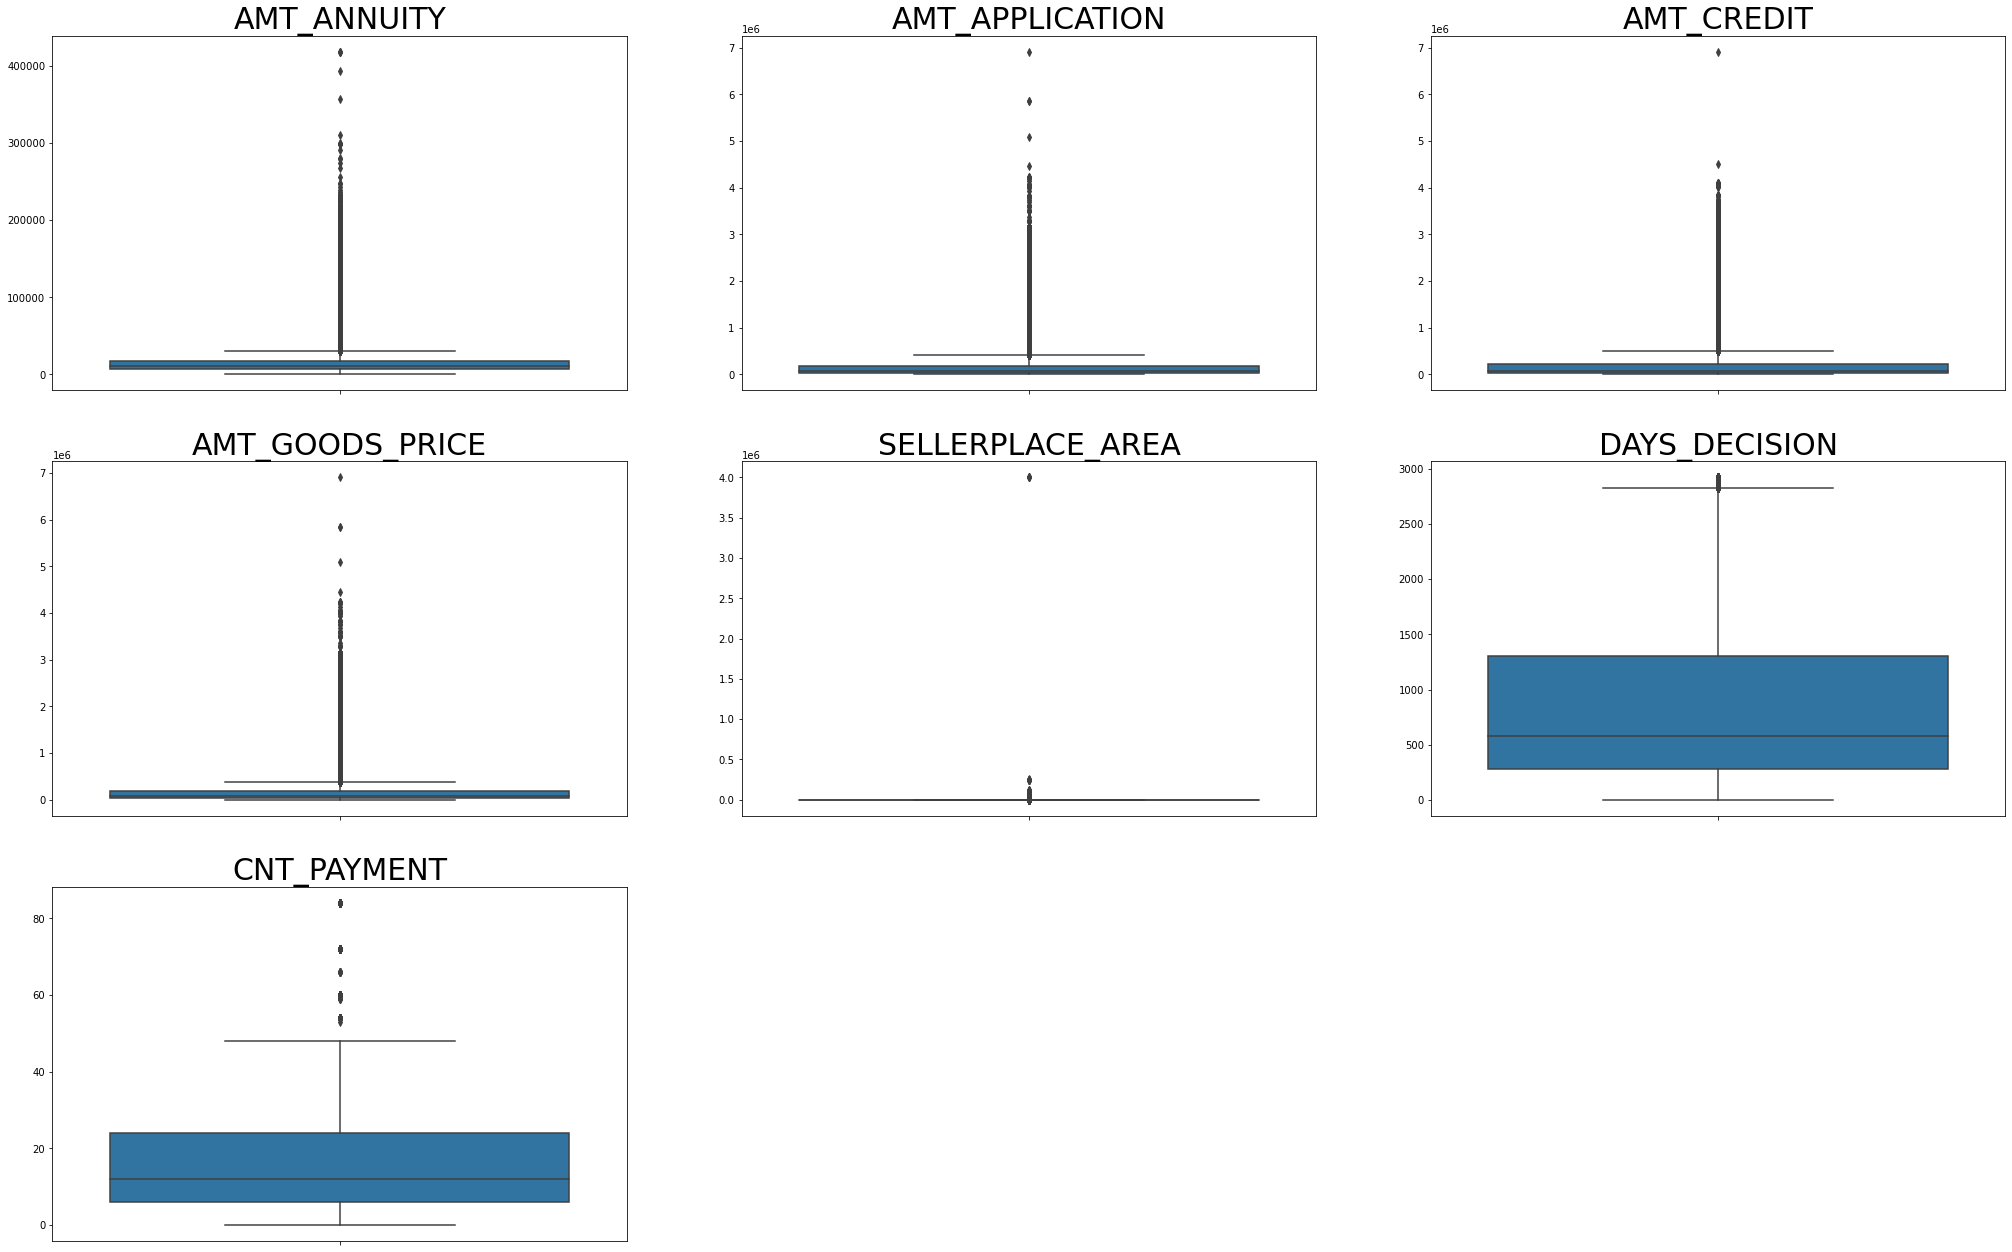

In [96]:
# Ploting the boxplot for each of below column to check the outliers
plt.figure(figsize=[35,30])
outlier_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'DAYS_DECISION', 'CNT_PAYMENT' ]
for i,j in zip(outlier_cols, range(len(outlier_cols))):
    plt.subplot(4,3, j+1)
    sns.boxplot(y=prev_data[i])
    plt.title(i, fontdict={'fontsize':30})
    plt.ylabel('')

The columns 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA' contain high values of outliers. The column 'CNT_PAYMENT' has few outliers.

## 8) Final analysis on Merged Data frame

In [97]:
# Merging the appl_data and prev_data data frames based on common column 'SK_ID_CURR' 
final_df = pd.merge(appl_data, prev_data, how='inner', on='SK_ID_CURR')
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,3.510,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,1.350,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


In [98]:
final_df.shape

(1413701, 83)

There are 1413701 rows and 83 columns in merged df

In [99]:
# Lets make the 2 new data frames based on 'TARGET' column
R0 = final_df[final_df['TARGET']==0] # Repayers
D1 = final_df[final_df['TARGET']==1] # Defaulters

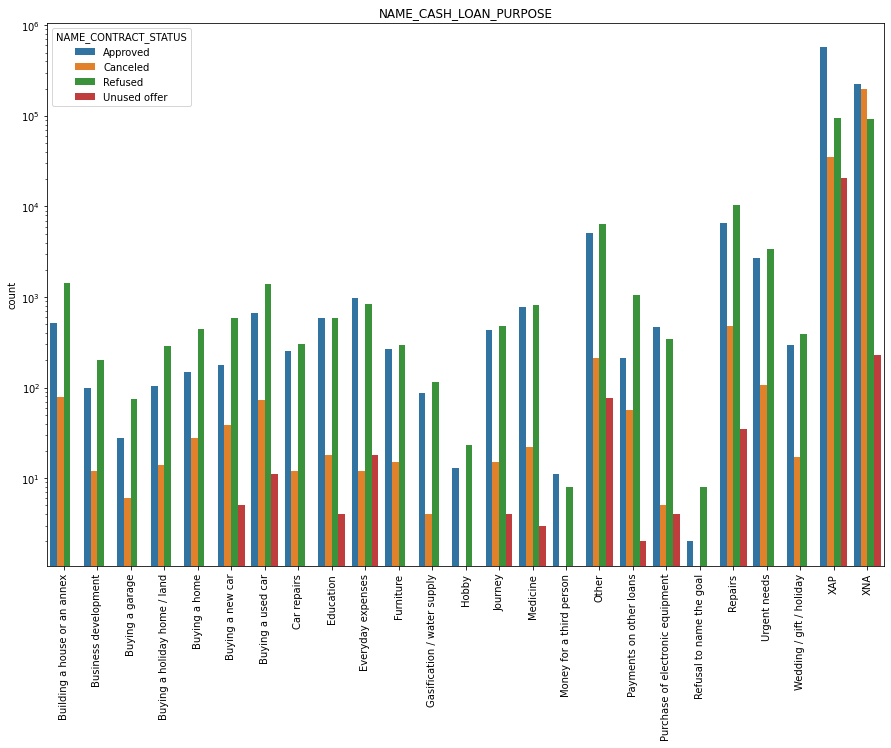

In [100]:
# Plotting the count plot for the purpose of the loan based on the contract status for R0 df
plt.figure(figsize=[15,10])
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data=R0)
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.yscale('log')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

There are high number of missing values in loan purpose section. Maximum applicants have refused the loan or the loan is cancelled by the bank for loan purpose section 'Repairs' and 'Others'. 

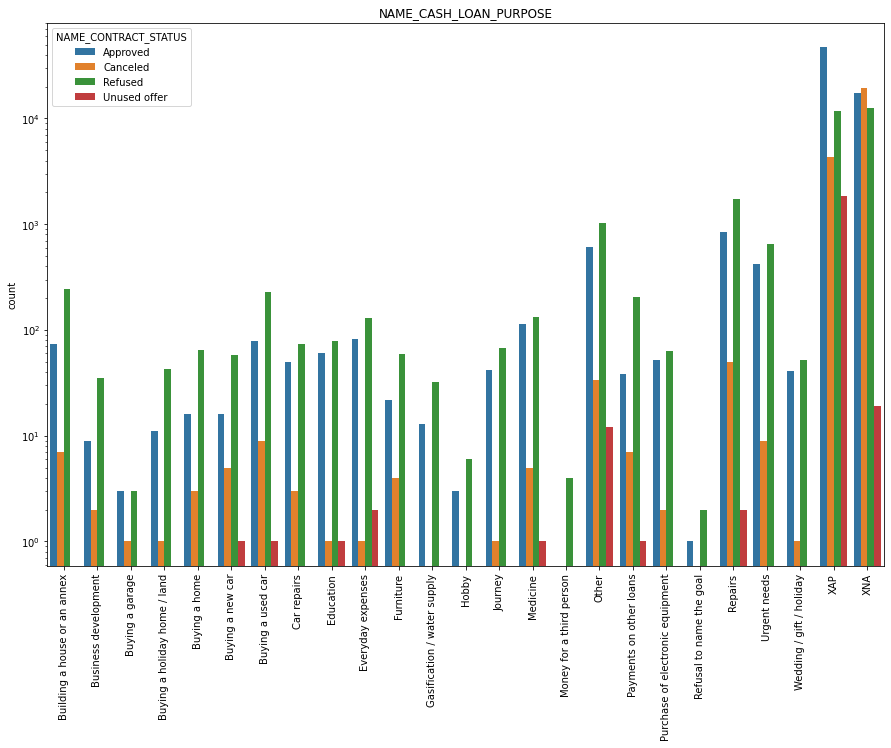

In [101]:
# Plotting the count plot for the purpose of the loan based on the contract status for D1 df
plt.figure(figsize=[15,10])
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data=D1)
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.yscale('log')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

The loan purpose section 'Repairs' and 'Others' are considered as high risk by the bank.

In [102]:
# Groupby the 'NAME_CONTRACT_STATUS' column and take the value counts of 'TARGET' column, to check the contract status based on loan repayment status
df = final_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].value_counts(normalize=True)*100
df

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411345
                      1          7.588655
Canceled              0         90.826431
                      1          9.173569
Refused               0         88.003586
                      1         11.996414
Unused offer          0         91.748276
                      1          8.251724
Name: TARGET, dtype: float64

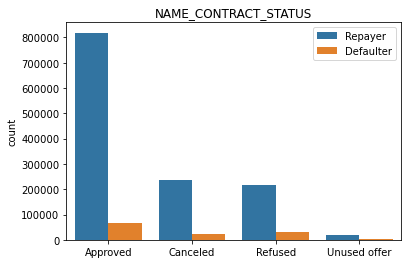

In [105]:
# plot the count plot for 'NAME_CONTRACT_STATUS' based on 'TARGET' column
sns.countplot(x='NAME_CONTRACT_STATUS', hue='TARGET', data=final_df)
plt.title('NAME_CONTRACT_STATUS')
plt.xlabel('')
plt.legend(['Repayer', 'Defaulter'])
plt.show()

90% loan applications of the clients are canceled which are Repayers. There are 88% loan applications of the clients that are refused. These clients are likely to pay the loan. The reason for cancellation or refusal of the loan by the client should be noted for further analysis. Revising the interest rate of the loan might help these clients.

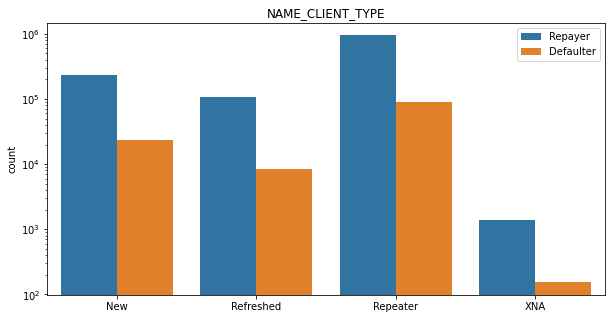

NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE  TARGET
Approved              New               0         91.178448
                                        1          8.821552
                      Refreshed         0         93.484214
                                        1          6.515786
                      Repeater          0         92.785584
                                        1          7.214416
                      XNA               0         92.873563
                                        1          7.126437
Canceled              New               0         85.479452
                                        1         14.520548
                      Refreshed         0         91.890214
                                        1          8.109786
                      Repeater          0         90.823310
                                        1          9.176690
                      XNA               0         89.862328
                                        1         10.

In [106]:
# Checking the relation between columns 'NAME_CLIENT_TYPE' and 'TARGET' 
plt.figure(figsize=[10,5])
sns.countplot(x='NAME_CLIENT_TYPE', hue='TARGET', data=final_df)
plt.yscale('log')
plt.title('NAME_CLIENT_TYPE')
plt.xlabel('')
plt.legend(['Repayer', 'Defaulter'])
plt.show()


final_df.groupby(['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE'])['TARGET'].value_counts(normalize=True)*100

Most of the clients are from repeater client type. 90% of the loan applications from repeater client type are canceled in earlier case. These clients might be repayer. 88% of the loan applications from new type clients are refused in previous case. These clients are likely to pay the loan.

## 9) Conclusions

###  90% of the previously cancelled clients are not defaulters. Recording the reason for cancellation or rejection of the loan and revising the interest rate of the loan might get help the bank to increase the buisness opportunity in future.

### The loan taken for the purpose of Repairs have high default rate. Maximum number of loan applications are rejected by the bank or canceled by the client in previous loan application for the purpose Repairs and Others. Therefore the purpose Repairs should be taken as a risk by the bank. Either they are rejected or offer very high interest rate is the best option

### The bank must target the clients with income type Student, Buisnessman, Pensioner for profitable buisness as they have lower default rate.